In [1]:
#from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
plt.rcParams['font.sans-serif'] = 'Arial'

In [2]:
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
f = open("EA_RF_original_database.csv", encoding = 'utf-8')

In [5]:
df = pd.read_csv(f)
#df

In [29]:
x = df.drop(["Young's modulus(MPa)"], axis = 1, inplace = False)
y = df["Young's modulus(MPa)"]

In [30]:
Xtrain,Xtest,Ytrain,Ytest = TTS(x, y, test_size=0.3, random_state=8)

In [31]:
# 创建随机森林回归模型
rf = RFR()


# 定义超参数空间
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': [5,10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建一个GridSearchCV对象
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# 在训练数据上拟合GridSearchCV对象
grid_search.fit(Xtrain, Ytrain)

# 获取最佳超参数
best_params = grid_search.best_params_

# 获取最佳模型
best_rf = grid_search.best_estimator_

# 在整个数据集上评估模型
y_pred = best_rf.predict(Xtest)
r2 = r2_score(Ytest, y_pred)
print("最佳超参数:", best_params)
print("R^2值:", r2)

最佳超参数: {'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
R^2值: 0.4358236753295419


In [32]:
rf = RFR(max_features = 15
        , min_samples_leaf = 1
        , min_samples_split = 10
        , n_estimators = 100
        , random_state=8)

In [41]:
X_train_r, X_test_r, y_train_r, y_test_r = TTS(x, y, test_size=0.3, random_state=7)
rf_r = rf.fit(X_train_r, y_train_r)
y_pred_r = rf_r.predict(X_test_r)
r2_r = r2_score(y_test_r, y_pred_r)
r2_r

0.8570339393991943

In [42]:
y_predict_rf = rf.predict(x)

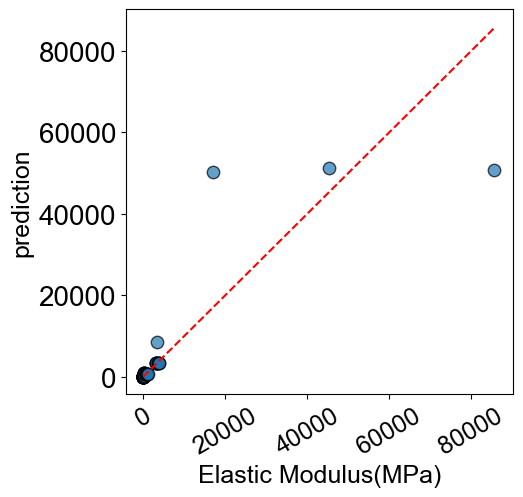

In [43]:
plt.figure(figsize = (5,5))
plt.plot([0,86000], [0,86000], 'r--')
plt.xlabel("Elastic Modulus(MPa)", fontsize = 18)
plt.ylabel("prediction", fontsize = 18)
plt.scatter(y, y_predict_rf, s=80, edgecolor ='k', alpha = 0.7)

plt.yticks(fontsize = 20)
plt.xticks(fontsize = 18, rotation = 30)

#plt.text(18000, 78000, f"$R^2$: 0.84",
         #horizontalalignment='center',
         #verticalalignment='center', 
         #transform=ax.transAxes, 
         #fontsize = 16,
         #bbox=dict(facecolor='red', alpha=0.2))
plt.savefig("弹性模量RF_0416",dpi=300,bbox_inches='tight')

In [7]:
import shap

In [45]:
explainer1 = shap.TreeExplainer(rf)
shap_values1 = explainer1.shap_values(x)

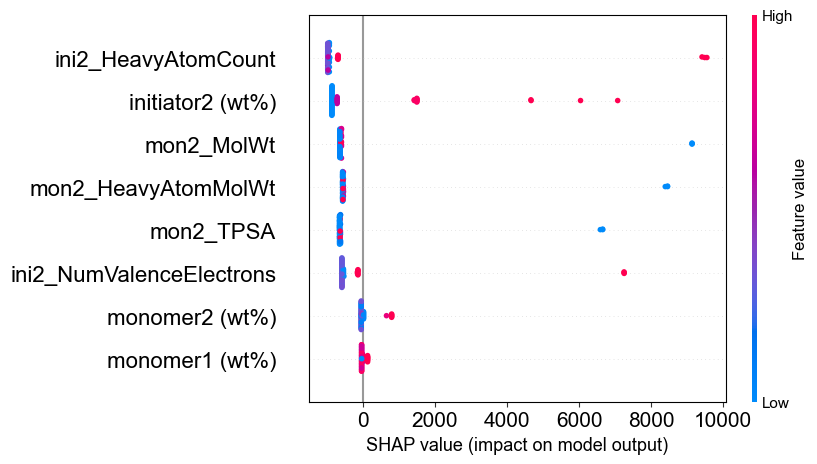

In [46]:
# 画出summary_plot散点图
fig, ax = plt.subplots(figsize=(20, 20))
shap.summary_plot(shap_values1, x, show=False
                  , max_display=8
                 )

# 保存散点图
plt.yticks(fontsize = 16,color='k')
plt.xticks(fontsize = 15,color='k')

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

#plt.savefig('summary_plot_NIPAAM_V_0316.png', bbox_inches='tight', dpi=300)

# 显示散点图
plt.show()

In [ ]:
#剔除最高10%数据

In [9]:
data = open("EA_RF_10%.csv", encoding = 'utf-8')
#data

In [10]:
data1 = pd.read_csv(data)
#data1

In [58]:
x1 = data1.drop(["Young's modulus(MPa)"], axis = 1, inplace = False)
y1 = data1["Young's modulus(MPa)"]

In [59]:
y_predict_rf1 = rf.predict(x1)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

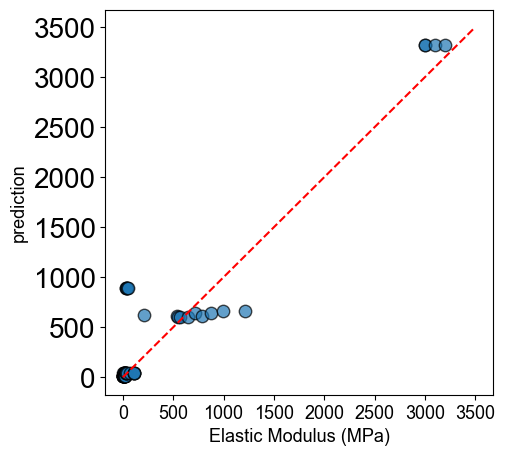

In [60]:
plt.figure(figsize = (5,5))
plt.plot([0,3500], [0,3500], 'r--')
plt.xlabel("Elastic Modulus (MPa)", fontsize = 13)
plt.ylabel("prediction", fontsize = 13)
plt.scatter(y1, y_predict_rf1, s=80, edgecolor ='k', alpha = 0.7)

plt.yticks(fontsize = 20)
plt.xticks(fontsize = 13)

#plt.text(500, 3200, f"$R^2$: {score_rf_V1}",
        # horizontalalignment='center',
         #verticalalignment='center', 
         #transform=ax.transAxes, 
         #fontsize = 16,
         #bbox=dict(facecolor='red', alpha=0.2))
#plt.savefig("NIPAAM_Frontal Velocity_0221_8个特征",dpi=300,bbox_inches='tight')

In [17]:
explainer2 = shap.TreeExplainer(regressor_rf1)
shap_values2 = explainer2.shap_values(x1)

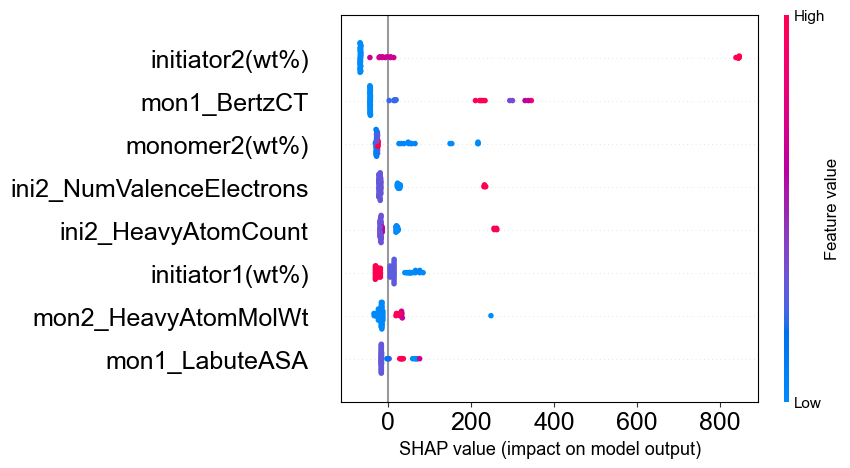

In [18]:
# 画出summary_plot散点图
fig, ax = plt.subplots(figsize=(20, 20))
shap.summary_plot(shap_values2, x1, show=False
                  , max_display=8
                 )

# 保存散点图
plt.yticks(fontsize = 18,color='k')
plt.xticks(fontsize = 18,color='k')

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig('huanyang_EA_10%', bbox_inches='tight', dpi=300)

# 显示散点图
plt.show()

In [ ]:
#去掉最高20%的点画图

In [19]:
dat = open("EA_RF_20%.csv", encoding = 'utf-8')

In [20]:
dat1 = pd.read_csv(dat)
#dat1

In [21]:
x2 = dat1.drop(["Young's modulus(MPa)"], axis = 1, inplace = False)
y2 = dat1["Young's modulus(MPa)"]

In [22]:
y_predict_rf2 = regressor_rf1.predict(x2)

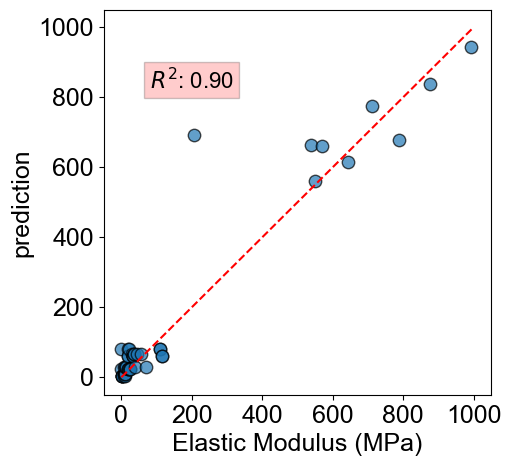

In [23]:
plt.figure(figsize = (5,5))
plt.plot([0,1000], [0,1000], 'r--')
plt.xlabel("Elastic Modulus (MPa)", fontsize = 18)
plt.ylabel("prediction", fontsize = 18)
plt.scatter(y2, y_predict_rf2, s=80, edgecolor ='k', alpha = 0.7)

plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.text(200, 850, f"$R^2$: 0.90",
         horizontalalignment='center',
         verticalalignment='center', 
         #transform=ax.transAxes, 
         fontsize = 16,
         bbox=dict(facecolor='red', alpha=0.2))
plt.savefig("huanyang_EA_去除最高点画图0416",dpi=300,bbox_inches='tight')

In [ ]:
#范围120之内的点画图

In [88]:
da = open("EA_RF_120.csv", encoding = 'utf-8')

In [89]:
da1 = pd.read_csv(da)
da1

,mon1_BertzCT,mon1_LabuteASA,mon1_MolMR,monomer1(wt%),mon2_MolWt,mon2_HeavyAtomMolWt,mon2_TPSA,monomer2(wt%),initiator1(wt%),ini2_NumValenceElectrons,ini2_Ipc,ini2_HeavyAtomCount,initiator2(wt%),Young's modulus(MPa)
0,265.736828,125.512219,74.401,80,60.08400,60.08400,34.1400,20,5,84.58,3.088084e+05,14.36,0,0.0
1,265.736828,125.512219,74.401,80,60.08400,60.08400,34.1400,20,15,84.58,3.088084e+05,14.36,0,0.0
2,265.736828,125.512219,74.401,95,60.08400,60.08400,34.1400,5,15,83.40,3.088084e+05,14.14,0,1.0
3,265.736828,125.512219,74.401,95,60.08400,60.08400,34.1400,5,15,83.40,3.088084e+05,14.14,0,1.0
4,265.736828,125.512219,74.401,95,60.08400,60.08400,34.1400,5,15,83.40,3.088084e+05,14.14,0,1.5
5,265.736828,125.512219,74.401,95,60.08400,60.08400,34.1400,5,15,83.40,3.088084e+05,14.14,0,2.9
6,265.736828,125.512219,74.401,95,60.08400,60.08400,34.1400,5,15,83.40,3.088084e+05,14.14,0,3.0
7,265.736828,125.512219,74.401,80,50.83123,55.22216,33.7260,20,15,84.58,3.088084e+05,14.36,0,6.0
8,265.736828,125.512219,74.401,80,50.83123,55.22216,33.7260,20,15,84.58,3.088084e+05,14.36,0,7.3
9,265.736828,125.512219,74.401,80,50.83123,55.22216,33.7260,20,5,84.58,3.088084e+05,14.36,0,8.5


In [90]:
x3 = da1.drop(["Young's modulus(MPa)"], axis = 1, inplace = False)
y3 = da1["Young's modulus(MPa)"]

In [91]:
y_predict_rf3 = regressor_rf1.predict(x3)

Text(20, 85, '$R^2$: 0.90')

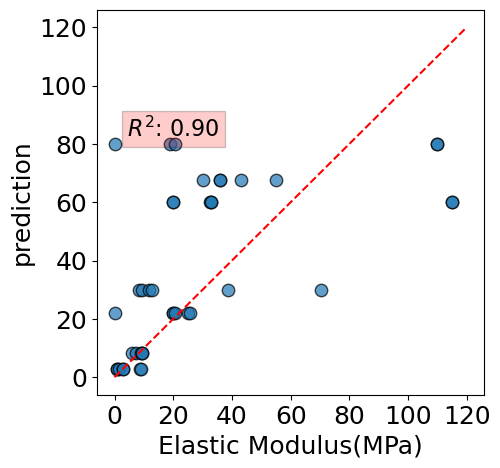

In [92]:
plt.figure(figsize = (5,5))
plt.plot([0,120], [0,120], 'r--')
plt.xlabel("Elastic Modulus(MPa)", fontsize = 18)
plt.ylabel("prediction", fontsize = 18)
plt.scatter(y3, y_predict_rf3, s=80, edgecolor ='k', alpha = 0.7)

plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.text(20, 85, f"$R^2$: 0.90",
         horizontalalignment='center',
         verticalalignment='center', 
         #transform=ax.transAxes, 
         fontsize = 16,
         bbox=dict(facecolor='red', alpha=0.2))
#plt.savefig("NIPAAM_Frontal Velocity_0221_8个特征",dpi=300,bbox_inches='tight')